# Team Members
Name (as appears in Canvas)		ID NO
1. Venkatesh K M				2019CH04565
2. Bhaskar Ranjan Dutt			2019CH04519
3. Shama Praveen				2019CH04571
4. Riaz Ahamed Shariff			2019CH04548
5. Shree Vidhya Meiyappan 		2019CH04541

# Question 1
Understand all the provided attributes, perform missing value treatment if required

# Question 2

Perform feature engineering, add, remove and transform features that can help improve.

# Question 3
Identify numerical and categorical attributes and perform conversions as necessary.

In [1]:
## Defining the environment, importing the libraries. Installing Boruta package

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from pandas_profiling import ProfileReport
import datetime
from sklearn.preprocessing import LabelEncoder
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier

#conda install -c saravji boruta
#conda install -c conda-forge boruta_py

#import sys
#!{sys.executable} -m pip install boruta
#!{sys.executable} -m pip install boruta_py


from boruta import BorutaPy
import warnings
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_recall_fscore_support
from imblearn.over_sampling import SMOTE
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
import statsmodels.api as sm
from sklearn.preprocessing import scale


%matplotlib inline

warnings.filterwarnings("ignore")


LEC = LabelEncoder()
pca = PCA(n_components=2)
ranfor = RandomForestClassifier(n_jobs=-1, class_weight='balanced', max_depth=5)
featur_select = BorutaPy(ranfor, n_estimators='auto', verbose=2, random_state=1)
oversample = SMOTE(random_state = 0)
logregress = LogisticRegression()
#filepath = 'C:\\Users\\venkatesh.k\\Documents\\MTECH BITS\\data.csv'
filepath = 'data.csv'


## Function to convert to date object into datetime type 
## so that any date time calculation can be done
def getDate(dte):
    if dte[-2:] == '00':
        return(datetime.datetime.strptime(str(dte[:-2])+'20'+str(dte[-2:]),'%d-%m-%Y').date(),int(datetime.datetime.strptime(str(dte[:-2])+'20'+str(dte[-2:]),'%d-%m-%Y').date().strftime('%Y%m%d')))
    else:
        return(datetime.datetime.strptime(str(dte[:-2])+'19'+str(dte[-2:]),'%d-%m-%Y').date(),int(datetime.datetime.strptime(str(dte[:-2])+'19'+str(dte[-2:]),'%d-%m-%Y').date().strftime('%Y%m%d')))
    
## Converting a string of information (year and month) to months
def getmonths(val):
    c = int()
    for j in val.split(' '):
        if 'y' in j:
            c = int(str(c) + str(j[:(j.find('y'))]))*12
        elif 'm' in j:
            c = c + int(str(j[:(j.find('m'))]))
    return c

## Function to do PCA
def getPCAattr(dfx,dfy):
    x = dfx.values
    PrinComp = pca.fit_transform(x)
    PrincDF = pd.DataFrame(data = PrinComp , columns = ['pcol1','pcol2'])
    FinalDf = pd.concat([PrincDF, dfy], axis = 1)
    fig = plt.figure(figsize = (10,10))
    pcp = fig.add_subplot(1,1,1) 
    pcp.set_xlabel('Principal Component 1', fontsize = 15)
    pcp.set_ylabel('Principal Component 2', fontsize = 15)
    plt.grid( linestyle='-', linewidth=1)
    pcp.set_title('2 component PCA', fontsize = 20)
    loanstat = [0, 1]
    colors = ['r', 'g']
    for target, color in zip(loanstat,colors):
        indicesToKeep = FinalDf['loan_default'] == target
        pcp.scatter(FinalDf.loc[indicesToKeep, 'pcol1'], FinalDf.loc[indicesToKeep, 'pcol2'], c = color, s = 50)
        pcp.legend(loanstat)
        pcp.grid()
    return FinalDf

## Function to use Recursive Feature Elimination Method

def loregr(x_train,y_train,x_test,y_test):
    logregress.fit(x_train, y_train)
    y_pred = logregress.predict(x_test)
    print('Accuracy of logistic regression classifier on test set: {:.2f}%'.format(logregress.score(x_test, y_test)*100))
    confMatrix = confusion_matrix(y_test, y_pred)
    print('Confusion Matrix is below \n{} \n ===================================================================='.format(confMatrix))
    print('--------------------------------------------------------------------------------')
    print('The classification report is below \n')
    print(classification_report(y_test, y_pred))
    print('--------------------------------------------------------------------------------')
    logit_roc_auc = roc_auc_score(y_test, logregress.predict(x_test))
    precision_recall_fscore = precision_recall_fscore_support(y_test, y_pred)
    precision = precision_recall_fscore[0][0]
    recall = precision_recall_fscore[1][0]
    fscore = precision_recall_fscore[2][0]
    print('Precision score is {:.2f}% \n Recall Score is {:.2f}% \n F1 score is {:.2f}%'.format(precision*100,recall*100,fscore*100))
    fpr, tpr, thresholds = roc_curve(y_test, logregress.predict_proba(x_test)[:,1])
    plt.figure()
    plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlabel('False+Rate', fontsize = 12)
    plt.ylabel('True+Rate', fontsize = 12)
    plt.grid( linestyle='-', linewidth=1)
    plt.legend(loc="lower right")

/Users/bhaskarranjan.dutt/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
## Reading the file and loading to a dataframe

IDS_df = pd.read_csv(filepath, header = 0)

print(IDS_df.shape)
print(list(IDS_df.columns))

IDS_df['Age'] = ((datetime.datetime.today().date() - IDS_df['Date.of.Birth'].apply(lambda x: getDate(x)[0])).astype('timedelta64[D]')/365).astype(int)

IDS_df_x = IDS_df[['UniqueID', 'disbursed_amount', 'asset_cost', 'ltv', 'branch_id','supplier_id', 'manufacturer_id', 'Current_pincode_ID', 'Date.of.Birth','Employment.Type', 'DisbursalDate', 'State_ID', 'Employee_code_ID','MobileNo_Avl_Flag', 'Aadhar_flag', 'PAN_flag', 'VoterID_flag','Driving_flag', 'Passport_flag', 'PERFORM_CNS.SCORE','PERFORM_CNS.SCORE.DESCRIPTION', 'PRI.NO.OF.ACCTS', 'PRI.ACTIVE.ACCTS','PRI.OVERDUE.ACCTS', 'PRI.CURRENT.BALANCE', 'PRI.SANCTIONED.AMOUNT','PRI.DISBURSED.AMOUNT', 'SEC.NO.OF.ACCTS', 'SEC.ACTIVE.ACCTS','SEC.OVERDUE.ACCTS', 'SEC.CURRENT.BALANCE', 'SEC.SANCTIONED.AMOUNT','SEC.DISBURSED.AMOUNT', 'PRIMARY.INSTAL.AMT', 'SEC.INSTAL.AMT','NEW.ACCTS.IN.LAST.SIX.MONTHS', 'DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS','AVERAGE.ACCT.AGE', 'CREDIT.HISTORY.LENGTH', 'NO.OF_INQUIRIES', 'Age']]
IDS_df_y = IDS_df[['loan_default']]

(233154, 41)
['UniqueID', 'disbursed_amount', 'asset_cost', 'ltv', 'branch_id', 'supplier_id', 'manufacturer_id', 'Current_pincode_ID', 'Date.of.Birth', 'Employment.Type', 'DisbursalDate', 'State_ID', 'Employee_code_ID', 'MobileNo_Avl_Flag', 'Aadhar_flag', 'PAN_flag', 'VoterID_flag', 'Driving_flag', 'Passport_flag', 'PERFORM_CNS.SCORE', 'PERFORM_CNS.SCORE.DESCRIPTION', 'PRI.NO.OF.ACCTS', 'PRI.ACTIVE.ACCTS', 'PRI.OVERDUE.ACCTS', 'PRI.CURRENT.BALANCE', 'PRI.SANCTIONED.AMOUNT', 'PRI.DISBURSED.AMOUNT', 'SEC.NO.OF.ACCTS', 'SEC.ACTIVE.ACCTS', 'SEC.OVERDUE.ACCTS', 'SEC.CURRENT.BALANCE', 'SEC.SANCTIONED.AMOUNT', 'SEC.DISBURSED.AMOUNT', 'PRIMARY.INSTAL.AMT', 'SEC.INSTAL.AMT', 'NEW.ACCTS.IN.LAST.SIX.MONTHS', 'DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS', 'AVERAGE.ACCT.AGE', 'CREDIT.HISTORY.LENGTH', 'NO.OF_INQUIRIES', 'loan_default']


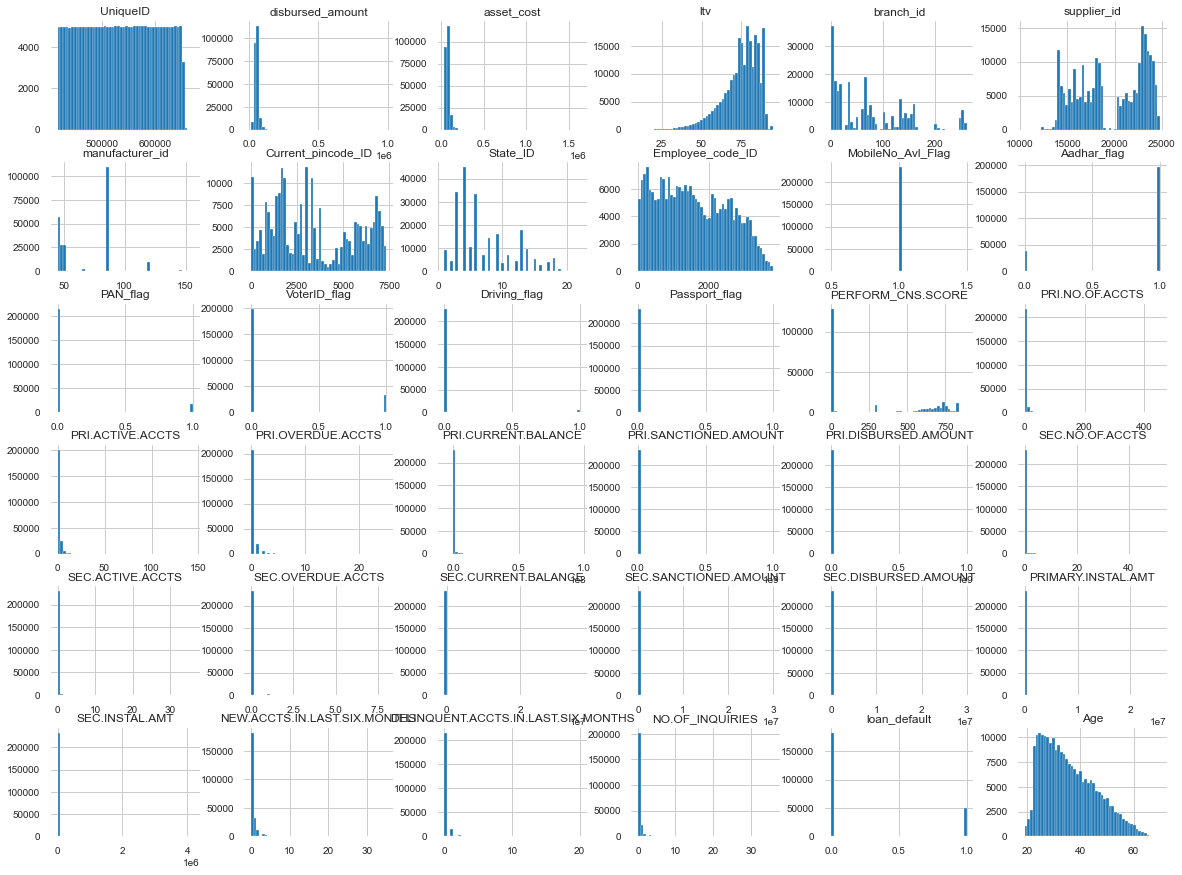

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 233154 entries, 0 to 233153
Data columns (total 42 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   UniqueID                             233154 non-null  int64  
 1   disbursed_amount                     233154 non-null  int64  
 2   asset_cost                           233154 non-null  int64  
 3   ltv                                  233154 non-null  float64
 4   branch_id                            233154 non-null  int64  
 5   supplier_id                          233154 non-null  int64  
 6   manufacturer_id                      233154 non-null  int64  
 7   Current_pincode_ID                   233154 non-null  int64  
 8   Date.of.Birth                        233154 non-null  object 
 9   Employment.Type                      225493 non-null  object 
 10  DisbursalDate                        233154 non-null  object 
 11  State_ID     

Empty DataFrame
Columns: []
Index: []

In [3]:
## The use of the block to find out the data relationship 

IDS_df.hist(bins=50, figsize=(20,15))
plt.show()
pd.DataFrame(IDS_df.info())

In [4]:
## Finding the Missing value
IDS_df_x.isnull().sum()

UniqueID                                  0
disbursed_amount                          0
asset_cost                                0
ltv                                       0
branch_id                                 0
supplier_id                               0
manufacturer_id                           0
Current_pincode_ID                        0
Date.of.Birth                             0
Employment.Type                        7661
DisbursalDate                             0
State_ID                                  0
Employee_code_ID                          0
MobileNo_Avl_Flag                         0
Aadhar_flag                               0
PAN_flag                                  0
VoterID_flag                              0
Driving_flag                              0
Passport_flag                             0
PERFORM_CNS.SCORE                         0
PERFORM_CNS.SCORE.DESCRIPTION             0
PRI.NO.OF.ACCTS                           0
PRI.ACTIVE.ACCTS                

In [5]:
## There is only one attribute which has missing values.
## Missing value treatment
print(IDS_df_x['Employment.Type'].value_counts())

#Used bfill method to fill the missing values in Employment.Type attribute. 
#Post bfill operation, the data looks like as below.
print('Using Back Fill method to treat missing values')

IDS_df_x['Employment.Type'] = IDS_df_x['Employment.Type'].fillna(method = 'bfill')
IDS_df_x['Employment.Type'].value_counts()

Self employed    127635
Salaried          97858
Name: Employment.Type, dtype: int64
Using Back Fill method to treat missing values


Self employed    132002
Salaried         101152
Name: Employment.Type, dtype: int64

In [6]:
## Performing Pandas Profiling

prof = ProfileReport(IDS_df_x)
#prof.to_file('C:\\Users\\venkatesh.k\\Documents\\MTECH BITS\\ProfileReport.html')
prof.to_file('ProfileReport.html')

In [7]:
#Transforming the categorical features to numerical & date features as DateTime
#converting the following attribute to type "category"

## Date.of.Birth and DisbursalDate have been converted into Date Field

IDS_df_x['Date.of.Birth'] = IDS_df_x['Date.of.Birth'].apply(lambda x: getDate(x)[0])
IDS_df_x['DisbursalDate'] = IDS_df_x['DisbursalDate'].apply(lambda x: getDate(x)[1])

In [8]:
## Converting the existing data of AVERAGE.ACCT.AGE and CREDIT.HISTORY.LENGTH into Months

IDS_df_x['AVERAGE.ACCT.AGE'] = IDS_df_x['AVERAGE.ACCT.AGE'].apply(lambda x:getmonths(x))
IDS_df_x['CREDIT.HISTORY.LENGTH'] = IDS_df_x['CREDIT.HISTORY.LENGTH'].apply(lambda x:getmonths(x))

In [9]:
IDS_df_x['Employment.Type']= LEC.fit_transform(IDS_df_x['Employment.Type'])
IDS_df_x['PERFORM_CNS.SCORE.DESCRIPTION'] = LEC.fit_transform(IDS_df_x['PERFORM_CNS.SCORE.DESCRIPTION'])

catvar = ['Date.of.Birth','UniqueID','branch_id','supplier_id','manufacturer_id',
          'Current_pincode_ID','Employment.Type','State_ID','Employee_code_ID',
          'MobileNo_Avl_Flag','Aadhar_flag','PAN_flag','VoterID_flag','Driving_flag',
          'Passport_flag','PERFORM_CNS.SCORE.DESCRIPTION','DisbursalDate']

for i in catvar:
    IDS_df_x[i] = IDS_df_x[i].astype('category')
print(IDS_df_x.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 233154 entries, 0 to 233153
Data columns (total 41 columns):
 #   Column                               Non-Null Count   Dtype   
---  ------                               --------------   -----   
 0   UniqueID                             233154 non-null  category
 1   disbursed_amount                     233154 non-null  int64   
 2   asset_cost                           233154 non-null  int64   
 3   ltv                                  233154 non-null  float64 
 4   branch_id                            233154 non-null  category
 5   supplier_id                          233154 non-null  category
 6   manufacturer_id                      233154 non-null  category
 7   Current_pincode_ID                   233154 non-null  category
 8   Date.of.Birth                        233154 non-null  category
 9   Employment.Type                      233154 non-null  category
 10  DisbursalDate                        233154 non-null  category
 11  

In [10]:
## Scaling of Numerical data

IDS_df_xnum = IDS_df_x.select_dtypes(exclude=['category'])
IDS_df_xcat = IDS_df_x.select_dtypes(include=['category'])
IDS_df_xsnum = scale(IDS_df_xnum)
IDS_df_xnum1 = pd.DataFrame(IDS_df_xsnum, columns = list(IDS_df_xnum.columns))
IDS_df_xs = pd.concat([IDS_df_xcat,IDS_df_xnum1],axis=1, sort=False)

Iteration: 	1 / 100
Confirmed: 	0
Tentative: 	37
Rejected: 	0
Iteration: 	2 / 100
Confirmed: 	0
Tentative: 	37
Rejected: 	0
Iteration: 	3 / 100
Confirmed: 	0
Tentative: 	37
Rejected: 	0
Iteration: 	4 / 100
Confirmed: 	0
Tentative: 	37
Rejected: 	0
Iteration: 	5 / 100
Confirmed: 	0
Tentative: 	37
Rejected: 	0
Iteration: 	6 / 100
Confirmed: 	0
Tentative: 	37
Rejected: 	0
Iteration: 	7 / 100
Confirmed: 	0
Tentative: 	37
Rejected: 	0
Iteration: 	8 / 100
Confirmed: 	28
Tentative: 	1
Rejected: 	8
Iteration: 	9 / 100
Confirmed: 	28
Tentative: 	1
Rejected: 	8
Iteration: 	10 / 100
Confirmed: 	28
Tentative: 	1
Rejected: 	8
Iteration: 	11 / 100
Confirmed: 	28
Tentative: 	1
Rejected: 	8
Iteration: 	12 / 100
Confirmed: 	28
Tentative: 	1
Rejected: 	8
Iteration: 	13 / 100
Confirmed: 	28
Tentative: 	0
Rejected: 	9


BorutaPy finished running.

Iteration: 	14 / 100
Confirmed: 	28
Tentative: 	0
Rejected: 	9


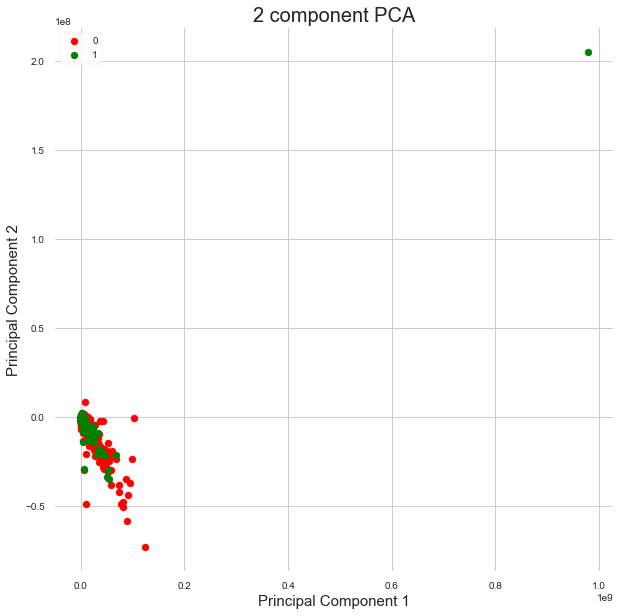

In [11]:
## From the above correlation output, the following attributes have been identified to drop
## as they are highly correlated with other attributes.

delcols = ['PRI.DISBURSED.AMOUNT','SEC.CURRENT.BALANCE','SEC.DISBURSED.AMOUNT','Date.of.Birth']
IDS_df_x.drop(columns = delcols, inplace = True)

getPCAattr(IDS_df_x,IDS_df_y)
featur_select.fit(IDS_df_x.values, IDS_df_y.values)
attrchk = list(featur_select.support_)
colslist1 = list(IDS_df_x.columns)
ColsNeeded = []

for i in range(len(attrchk)):
    if attrchk[i] == True:
        ColsNeeded.append(colslist1[i])

IDS_df1_x = IDS_df_x[ColsNeeded]

In [12]:
IDS_df1_x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 233154 entries, 0 to 233153
Data columns (total 28 columns):
 #   Column                               Non-Null Count   Dtype   
---  ------                               --------------   -----   
 0   UniqueID                             233154 non-null  category
 1   disbursed_amount                     233154 non-null  int64   
 2   asset_cost                           233154 non-null  int64   
 3   ltv                                  233154 non-null  float64 
 4   branch_id                            233154 non-null  category
 5   supplier_id                          233154 non-null  category
 6   manufacturer_id                      233154 non-null  category
 7   Current_pincode_ID                   233154 non-null  category
 8   Employment.Type                      233154 non-null  category
 9   DisbursalDate                        233154 non-null  category
 10  State_ID                             233154 non-null  category
 11  

In [13]:
IDS_df1_x.describe().T

count           mean           std  \
disbursed_amount                     233154.0   54356.993528  1.297131e+04   
asset_cost                           233154.0   75865.068144  1.894478e+04   
ltv                                  233154.0      74.746530  1.145664e+01   
PERFORM_CNS.SCORE                    233154.0     289.462994  3.383748e+02   
PRI.NO.OF.ACCTS                      233154.0       2.440636  5.217233e+00   
PRI.ACTIVE.ACCTS                     233154.0       1.039896  1.941496e+00   
PRI.OVERDUE.ACCTS                    233154.0       0.156549  5.487867e-01   
PRI.CURRENT.BALANCE                  233154.0  165900.076936  9.422736e+05   
PRI.SANCTIONED.AMOUNT                233154.0  218503.855323  2.374794e+06   
PRIMARY.INSTAL.AMT                   233154.0   13105.481720  1.513679e+05   
NEW.ACCTS.IN.LAST.SIX.MONTHS         233154.0       0.381833  9.551067e-01   
DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS  233154.0       0.097481  3.844390e-01   
AVERAGE.ACCT.AGE                     233154.0       8.915764  1.510642e+01   
CREDIT.HISTORY.LENGTH                233154.0      16.252404  2.858125e+01   
NO.OF_INQUIRIES                      233154.0       0.206615  7.064977e-01   
Age                                  233154.0      35.880525  9.828327e+00   

                                            min       25%      50%       75%  \
disbursed_amount                       13320.00  47145.00  53803.0  60413.00   
asset_cost                             37000.00  65717.00  70946.0  79201.75   
ltv                                       10.03     68.88     76.8     83.67   
PERFORM_CNS.SCORE                          0.00      0.00      0.0    678.00   
PRI.NO.OF.ACCTS                            0.00      0.00      0.0      3.00   
PRI.ACTIVE.ACCTS                           0.00      0.00      0.0      1.00   
PRI.OVERDUE.ACCTS                          0.00      0.00      0.0      0.00   
PRI.CURRENT.BALANCE                 -6678296.00      0.00      0.0  35006.50   
PRI.SANCTIONED.AMOUNT                      0.00      0.00      0.0  62500.00   
PRIMARY.INSTAL.AMT                         0.00      0.00      0.0   1999.00   
NEW.ACCTS.IN.LAST.SIX.MONTHS               0.00      0.00      0.0      0.00   
DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS        0.00      0.00      0.0      0.00   
AVERAGE.ACCT.AGE                           0.00      0.00      0.0     13.00   
CREDIT.HISTORY.LENGTH                      0.00      0.00      0.0     24.00   
NO.OF_INQUIRIES                            0.00      0.00      0.0      0.00   
Age                                       19.00     28.00     34.0     43.00   

                                              max  
disbursed_amount                     9.905720e+05  
asset_cost                           1.628992e+06  
ltv                                  9.500000e+01  
PERFORM_CNS.SCORE                    8.900000e+02  
PRI.NO.OF.ACCTS                      4.530000e+02  
PRI.ACTIVE.ACCTS                     1.440000e+02  
PRI.OVERDUE.ACCTS                    2.500000e+01  
PRI.CURRENT.BALANCE                  9.652492e+07  
PRI.SANCTIONED.AMOUNT                1.000000e+09  
PRIMARY.INSTAL.AMT                   2.564281e+07  
NEW.ACCTS.IN.LAST.SIX.MONTHS         3.500000e+01  
DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS  2.000000e+01  
AVERAGE.ACCT.AGE                     3.690000e+02  
CREDIT.HISTORY.LENGTH                4.680000e+02  
NO.OF_INQUIRIES                      3.600000e+01  
Age                                  7.000000e+01

# Question 4
Split data into train and test dataset. train a logistic regression model to classify if loan will default. report precision, recall on both train and test data. 

In [14]:
## Splitting the data into Train and Test
## 70-30 ratio (Train-Test) was not giving good result on Test Data Set.
## Hence, used 65-35 ratio of Train-Test

x_train, x_test, y_train, y_test = train_test_split(IDS_df1_x, IDS_df_y, test_size=0.35, random_state=0)

In [15]:
print(x_train.shape, x_test.shape)

(151550, 28) (81604, 28)


Optimization terminated successfully.
         Current function value: 0.504479
         Iterations 6
                                   Results: Logit
Model:                    Logit                  Pseudo R-squared:       0.036      
Dependent Variable:       loan_default           AIC:                    235298.4195
Date:                     2020-08-13 20:50       BIC:                    235588.4842
No. Observations:         233154                 Log-Likelihood:         -1.1762e+05
Df Model:                 27                     LL-Null:                -1.2198e+05
Df Residuals:             233126                 LLR p-value:            0.0000     
Converged:                1.0000                 Scale:                  1.0000     
No. Iterations:           6.0000                                                    
------------------------------------------------------------------------------------
                                     Coef.  Std.Err.    z     P>|z|   [0.025  0.975

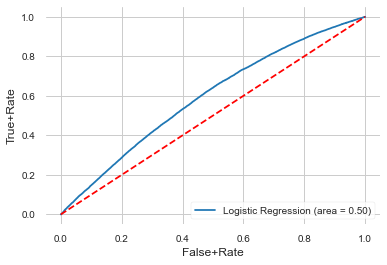

In [16]:
#Oversampling of data using SMOTE

osam_data_x,osam_data_y=oversample.fit_sample(x_train, y_train)
collistx = list(IDS_df1_x.columns)
collisty = list(IDS_df_y.columns)
osam_data_x = pd.DataFrame(data=osam_data_x, columns=collistx)
osam_data_y = pd.DataFrame(data=osam_data_y, columns=collisty)
logit_model=sm.Logit(IDS_df_y,IDS_df1_x.astype(float))
result=logit_model.fit(method='newton')
print(result.summary2())
loregr(x_train,y_train,x_test,y_test)

# Question 5: 
Check if model works well on test data and use regularization if required

# Question 6: 
See using PCA improves result

In [17]:
##Checking & removing the features based on Z score
resultsummary = pd.DataFrame(abs(pd.DataFrame(result.summary2().tables[1])['z'])).sort_values(by ='z', ascending = False)
LowInfAttr = list(resultsummary.nsmallest(5,['z']).index)
IDS_df1_xZ = IDS_df1_x.drop(columns = list(resultsummary.nsmallest(5,['z']).index))

In [18]:
## Splitting the data again based on Z-Score
xz_train, xz_test, yz_train, yz_test = train_test_split(IDS_df1_xZ, IDS_df_y, test_size=0.35, random_state=0)

Accuracy of logistic regression classifier on test set: 78.26%
Confusion Matrix is below 
[[63862     6]
 [17734     2]] 
--------------------------------------------------------------------------------
The classification report is below 

              precision    recall  f1-score   support

           0       0.78      1.00      0.88     63868
           1       0.25      0.00      0.00     17736

    accuracy                           0.78     81604
   macro avg       0.52      0.50      0.44     81604
weighted avg       0.67      0.78      0.69     81604

--------------------------------------------------------------------------------
Precision score is 78.27% 
 Recall Score is 99.99% 
 F1 score is 87.80%


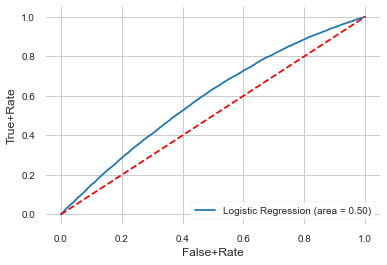

In [19]:
## Performing Logistic Regression

loregr(xz_train,yz_train,xz_test,yz_test)

In [20]:
featur_select.fit(IDS_df_xs.values, IDS_df_y.values)
attrchk1 = list(featur_select.support_)
colslist2 = list(IDS_df_xs.columns)
ColsNeeded1 = []

for i in range(len(attrchk)):
    if attrchk1[i] == True:
        ColsNeeded1.append(colslist1[i])

IDS_df1_xs = IDS_df_xs[ColsNeeded1]

Iteration: 	1 / 100
Confirmed: 	0
Tentative: 	41
Rejected: 	0
Iteration: 	2 / 100
Confirmed: 	0
Tentative: 	41
Rejected: 	0
Iteration: 	3 / 100
Confirmed: 	0
Tentative: 	41
Rejected: 	0
Iteration: 	4 / 100
Confirmed: 	0
Tentative: 	41
Rejected: 	0
Iteration: 	5 / 100
Confirmed: 	0
Tentative: 	41
Rejected: 	0
Iteration: 	6 / 100
Confirmed: 	0
Tentative: 	41
Rejected: 	0
Iteration: 	7 / 100
Confirmed: 	0
Tentative: 	41
Rejected: 	0
Iteration: 	8 / 100
Confirmed: 	30
Tentative: 	0
Rejected: 	11


BorutaPy finished running.

Iteration: 	9 / 100
Confirmed: 	30
Tentative: 	0
Rejected: 	11


In [21]:
logit_model=sm.Logit(IDS_df_y,IDS_df1_xs.astype(float))
result2=logit_model.fit(method='newton')
print('The Stat model results of the features finalized by Random Forest classifier')
print(result2.summary2())

Optimization terminated successfully.
         Current function value: 0.506116
         Iterations 6
The Stat model results of the features finalized by Random Forest classifier
                                Results: Logit
Model:                  Logit                Pseudo R-squared:     0.033      
Dependent Variable:     loan_default         AIC:                  236058.1620
Date:                   2020-08-13 20:52     BIC:                  236327.5078
No. Observations:       233154               Log-Likelihood:       -1.1800e+05
Df Model:               25                   LL-Null:              -1.2198e+05
Df Residuals:           233128               LLR p-value:          0.0000     
Converged:              1.0000               Scale:                1.0000     
No. Iterations:         6.0000                                                
------------------------------------------------------------------------------
                               Coef.  Std.Err.    z     P>|z|  

In [22]:
##Checking & removing the features based on Z score
##Based on latest parameters

resultsummary1 = pd.DataFrame(abs(pd.DataFrame(result2.summary2().tables[1])['z'])).sort_values(by ='z', ascending = False)
LowInfAttr1 = list(resultsummary1.nsmallest(5,['z']).index)
IDS_df2_xs = IDS_df1_xs.drop(columns = list(resultsummary1.nsmallest(5,['z']).index))

Accuracy of logistic regression classifier on test set: 78.32%
Confusion Matrix is below 
[[54779     0]
 [15168     0]] 
--------------------------------------------------------------------------------
The classification report is below 

              precision    recall  f1-score   support

           0       0.78      1.00      0.88     54779
           1       0.00      0.00      0.00     15168

    accuracy                           0.78     69947
   macro avg       0.39      0.50      0.44     69947
weighted avg       0.61      0.78      0.69     69947

--------------------------------------------------------------------------------
Precision score is 78.32% 
 Recall Score is 100.00% 
 F1 score is 87.84%


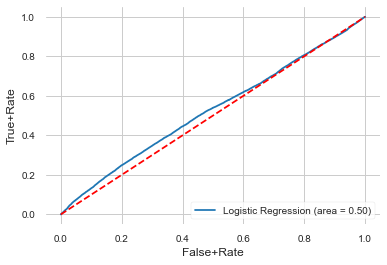

In [23]:
xs_train, xs_test, ys_train, ys_test = train_test_split(IDS_df2_xs, IDS_df_y, test_size=0.30, random_state=0)
loregr(xs_train,ys_train,xs_test,ys_test)